In [5]:
## Importing all the necessary modules.

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
## Downloading the data for ADANI Enterprises Limited

df = yf.download('ADANIENT.NS', start='2019-01-01')

[*********************100%***********************]  1 of 1 completed


In [7]:
## Defining the shortTerm & longTerm Values to calculate the Moving Average.
## Important Metrics -> Short Term = 50, Long Term = 200

shortTerm = 20
longTerm = 50


In [8]:

## Creating new columns holding the value of short term moving average & long term moving average in data frame.

df['MA-Short'] = df['Adj Close'].rolling(shortTerm).mean()
df['MA-Long'] = df['Adj Close'].rolling(longTerm).mean()


In [9]:
## Displaying the Data frame

df

,Open,High,Low,Close,Adj Close,Volume,MA-Short,MA-Long
Date,,,,,,,,
2019-01-01,160.899994,162.350006,155.449997,157.250000,155.465103,4726656,NaN,NaN
2019-01-02,157.000000,157.850006,152.500000,154.850006,153.092346,2735262,NaN,NaN
2019-01-03,154.899994,156.100006,150.300003,152.500000,150.769028,2758876,NaN,NaN
2019-01-04,152.100006,154.000000,150.000000,152.550003,150.818451,2777308,NaN,NaN
2019-01-07,152.899994,154.449997,150.250000,151.250000,149.533188,2714218,NaN,NaN
...,...,...,...,...,...,...,...,...
2023-03-24,1796.000000,1823.000000,1695.250000,1740.650024,1740.650024,6187968,1747.357507,2166.645996
2023-03-27,1740.650024,1757.400024,1682.000000,1723.050049,1723.050049,5053055,1767.727509,2128.162998
2023-03-28,1727.949951,1733.000000,1573.000000,1600.849976,1600.849976,8144878,1788.095007,2085.757000


In [10]:

## As we can see from the data frame, there are some NaN values, Removing those NaN values.
df = df.dropna()


In [11]:
df

,Open,High,Low,Close,Adj Close,Volume,MA-Short,MA-Long
Date,,,,,,,,
2019-03-13,148.399994,150.399994,145.399994,147.350006,145.677475,5700158,128.924814,135.861176
2019-03-14,147.399994,149.199997,143.600006,145.550003,143.897919,4052596,130.338583,135.629832
2019-03-15,145.800003,148.899994,140.250000,141.850006,140.239914,5981701,131.512605,135.372784
2019-03-18,142.399994,145.000000,140.350006,143.899994,142.266647,4934286,132.703927,135.202736
2019-03-19,144.449997,144.850006,140.500000,142.000000,140.388199,4320808,133.915023,134.994131
...,...,...,...,...,...,...,...,...
2023-03-24,1796.000000,1823.000000,1695.250000,1740.650024,1740.650024,6187968,1747.357507,2166.645996
2023-03-27,1740.650024,1757.400024,1682.000000,1723.050049,1723.050049,5053055,1767.727509,2128.162998
2023-03-28,1727.949951,1733.000000,1573.000000,1600.849976,1600.849976,8144878,1788.095007,2085.757000


In [12]:
## Only taking the required columns.

df = df[['Adj Close', 'MA-Short', 'MA-Long']]


In [13]:
df

,Adj Close,MA-Short,MA-Long
Date,,,
2019-03-13,145.677475,128.924814,135.861176
2019-03-14,143.897919,130.338583,135.629832
2019-03-15,140.239914,131.512605,135.372784
2019-03-18,142.266647,132.703927,135.202736
2019-03-19,140.388199,133.915023,134.994131
...,...,...,...
2023-03-24,1740.650024,1747.357507,2166.645996
2023-03-27,1723.050049,1767.727509,2128.162998
2023-03-28,1600.849976,1788.095007,2085.757000


In [14]:

## Implementing the CORE logic of Strategy.

## - At a given day, if MA-Short is above MA-Long but not the day before -> Then BUY.
## - At a given day, if MA-Long is above MA-Short but not the day before -> Then SELL.

buyList = []
sellList = []

for i in range(len(df)):
    if i > 0 and df.iloc[i]['MA-Short'] > df.iloc[i]['MA-Long'] and df.iloc[i - 1]['MA-Short'] < df.iloc[i - 1]['MA-Long']:
        buyList.append(i)
    elif i > 0 and df.iloc[i]['MA-Long'] > df.iloc[i]['MA-Short'] and df.iloc[i - 1]['MA-Long'] < df.iloc[i - 1]['MA-Short']:
        sellList.append(i)


In [15]:
buyList

[5, 52, 121, 292, 605, 752, 821, 905]

In [16]:
sellList

[33, 85, 245, 582, 726, 796, 893, 946]

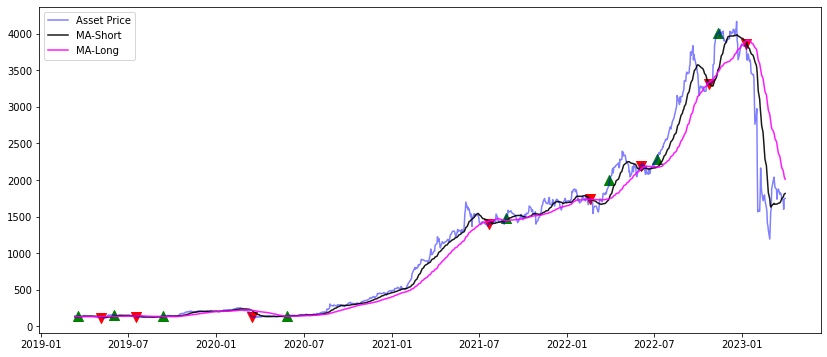

In [17]:
## Increasing the figure size
plt.figure(figsize = (14, 6))

## Plotting the Adjusted Close Price, MA-Short (Moving Average Short), MA-Long (Moving Average Long).
plt.plot(df['Adj Close'], label = 'Asset Price', c = 'blue', alpha = 0.5)
plt.plot(df['MA-Short'], label = 'MA-Short', c = 'k', alpha = 0.9)
plt.plot(df['MA-Long'], label = 'MA-Long', c = 'magenta', alpha = 0.9)

## Adding the marker on buying Index & selling Index.
plt.scatter(df.iloc[buyList].index, df.iloc[buyList]['Adj Close'], marker = '^', color = 'g', s = 100)
plt.scatter(df.iloc[sellList].index, df.iloc[sellList]['Adj Close'], marker = 'v', color = 'r', s = 100)

plt.legend()
plt.show()
